# DSCI 617 – Homework 03
**Felix Asare**

## Problem 1: Terminology

1. What is the name of the class that is used to define a schema?
StruckType()

2. What is the name of the class that is used to represent a column within a schema?
StruckField()

3. What is the name of a class used to indicate that a column is intended to store floating point values?
DoubleType()

4. What DataFrame method is used to display the contents of the DataFrame?
show()

5. What two DataFrame methods are used to display summary statistics (such as count, mean, standard deviation, min, and max) for each column in a DataFrame?
describe() and summary()

6. What DataFrame method is used to remove rows with missing entries from the DataFrame?
dropna()

7. Name two methods that can be used to add columns to a DataFrame.
col() and expr()

8. What method is used to perform one or more custom aggregations after grouping?
agg()

9. Name two Spark functions that accept as arguments strings representing names of DataFrame columns and return column objects.
col() udf()

10. What DataFrame transformation returns a DataFrame containing all of the columns from the original DataFrame, but only the rows that satisfy a stated condition?
filter()

## Problem 2: Columns and Expressions

1. sales_df.select('unit_price','units').show()

2. sales_df.select(col('unit_price'),expr('units')).show()

5. sales_df.select(expr('unit_price*units')).show()

6. sales_df.select(col('unit_price')*col('units')).show()

7. sales_df.select(expr('unit_price')*expr('units')).show()

10. sales_df.select(expr('sum(units)')).show()

## Problem 3: Diamonds Data (Part 1)


In [0]:
# Libraries of pyspark session and context
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()


In [0]:
# 1 Creating a custom schema for the diamond dataset
myschema = 'carat DOUBLE, cut STRING, color STRING, clarity STRING, depth DOUBLE, table DOUBLE, price DOUBLE, x DOUBLE, y DOUBLE, z DOUBLE'

# 2 Reading the diamond dataset into a Spark DataFrame
diamonds = spark.read.csv('/FileStore/tables/diamonds.txt', schema=myschema, header=True, sep='\t')

# 3 Displaying the schema of the diamond dataset
diamonds.printSchema()


root
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: double (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)



In [0]:
# Number of rows in the diamond dataset
row_count = diamonds.count()
print(f"The number of rows in the DataFrame is: {row_count}")

The number of rows in the DataFrame is: 53940


In [0]:
# Displaying the first 10 rows
diamonds.show(10)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|326.0|3.95|3.98|2.43|
| 0.21|  Premium|    E|    SI1| 59.8| 61.0|326.0|3.89|3.84|2.31|
| 0.23|     Good|    E|    VS1| 56.9| 65.0|327.0|4.05|4.07|2.31|
| 0.29|  Premium|    I|    VS2| 62.4| 58.0|334.0| 4.2|4.23|2.63|
| 0.31|     Good|    J|    SI2| 63.3| 58.0|335.0|4.34|4.35|2.75|
| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|336.0|3.94|3.96|2.48|
| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|336.0|3.95|3.98|2.47|
| 0.26|Very Good|    H|    SI1| 61.9| 55.0|337.0|4.07|4.11|2.53|
| 0.22|     Fair|    E|    VS2| 65.1| 61.0|337.0|3.87|3.78|2.49|
| 0.23|Very Good|    H|    VS1| 59.4| 61.0|338.0| 4.0|4.05|2.39|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 10 rows



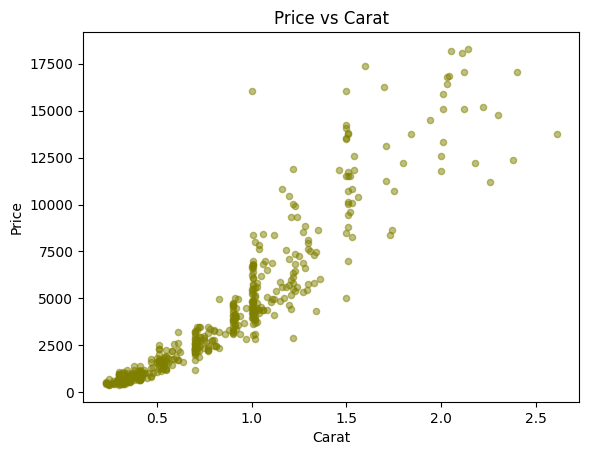

In [0]:
# Drawing sample from the dataset
sample_pdf = diamonds.sample(withReplacement=False, fraction=0.01, seed = 1)

import matplotlib.pyplot as plt

# Scatter plot for price vs carat with alpha 0.5
sample_pdf = sample_pdf.toPandas()
sample_pdf.plot.scatter(x='carat', y='price', color='olive', alpha=0.5)
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()



## Problem 4: Diamonds Data (Part 2)

In [0]:
# Finding the most expensive diamonds in the datase
diamonds.sort('price', ascending=False).show(5)

+-----+---------+-----+-------+-----+-----+-------+----+----+----+
|carat|      cut|color|clarity|depth|table|  price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-------+----+----+----+
| 2.29|  Premium|    I|    VS2| 60.8| 60.0|18823.0| 8.5|8.47|5.16|
|  2.0|Very Good|    G|    SI1| 63.5| 56.0|18818.0| 7.9|7.97|5.04|
| 1.51|    Ideal|    G|     IF| 61.7| 55.0|18806.0|7.37|7.41|4.56|
| 2.07|    Ideal|    G|    SI2| 62.5| 55.0|18804.0| 8.2|8.13|5.11|
|  2.0|Very Good|    H|    SI1| 62.8| 57.0|18803.0|7.95| 8.0|5.01|
+-----+---------+-----+-------+-----+-----+-------+----+----+----+
only showing top 5 rows



In [0]:
# Largest 5 diamonds
diamonds.sort('carat', ascending=False).show(5)

+-----+-------+-----+-------+-----+-----+-------+-----+-----+----+
|carat|    cut|color|clarity|depth|table|  price|    x|    y|   z|
+-----+-------+-----+-------+-----+-----+-------+-----+-----+----+
| 5.01|   Fair|    J|     I1| 65.5| 59.0|18018.0|10.74|10.54|6.98|
|  4.5|   Fair|    J|     I1| 65.8| 58.0|18531.0|10.23|10.16|6.72|
| 4.13|   Fair|    H|     I1| 64.8| 61.0|17329.0| 10.0| 9.85|6.43|
| 4.01|Premium|    I|     I1| 61.0| 61.0|15223.0|10.14| 10.1|6.17|
| 4.01|Premium|    J|     I1| 62.5| 62.0|15223.0|10.02| 9.94|6.24|
+-----+-------+-----+-------+-----+-----+-------+-----+-----+----+
only showing top 5 rows



In [0]:
# Adding price per carat to the dataset
from pyspark.sql.functions import col, expr, round
diamonds_ppc = diamonds.select(
    '*',
    round(expr('price / carat'), 2).alias('price_per_carat')
)

# Sorting diamonds_ppc by price_per_carat
diamonds_ppc.sort('price_per_carat', ascending=False).show(5)

+-----+---------+-----+-------+-----+-----+-------+----+----+----+---------------+
|carat|      cut|color|clarity|depth|table|  price|   x|   y|   z|price_per_carat|
+-----+---------+-----+-------+-----+-----+-------+----+----+----+---------------+
| 1.04|Very Good|    D|     IF| 61.3| 56.0|18542.0|6.53|6.55|4.01|       17828.85|
| 1.07|  Premium|    D|     IF| 60.9| 58.0|18279.0|6.67|6.57|4.03|       17083.18|
| 1.03|    Ideal|    D|     IF| 62.0| 56.0|17590.0|6.55|6.44|4.03|       17077.67|
| 1.07|Very Good|    D|     IF| 60.9| 58.0|18114.0|6.57|6.67|4.03|       16928.97|
| 1.02|Very Good|    D|     IF| 61.7| 59.0|17100.0|6.42|6.52|3.99|       16764.71|
+-----+---------+-----+-------+-----+-----+-------+----+----+----+---------------+
only showing top 5 rows



In [0]:
# Sorting diamonds_ppc by price_per_carat
diamonds_ppc.sort('price_per_carat').show(5)

+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
|carat|    cut|color|clarity|depth|table|price|   x|   y|   z|price_per_carat|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
| 0.43|Premium|    H|     I1| 62.0| 59.0|452.0|4.78|4.83|2.98|        1051.16|
| 0.32|Premium|    E|     I1| 60.9| 58.0|345.0|4.38|4.42|2.68|        1078.13|
| 0.31|   Good|    J|    SI2| 63.3| 58.0|335.0|4.34|4.35|2.75|        1080.65|
| 0.33|  Ideal|    J|    SI2| 62.4| 54.0|366.0|4.43|4.45|2.77|        1109.09|
| 0.31|  Ideal|    J|    SI2| 62.2| 54.0|344.0|4.35|4.37|2.71|        1109.68|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows



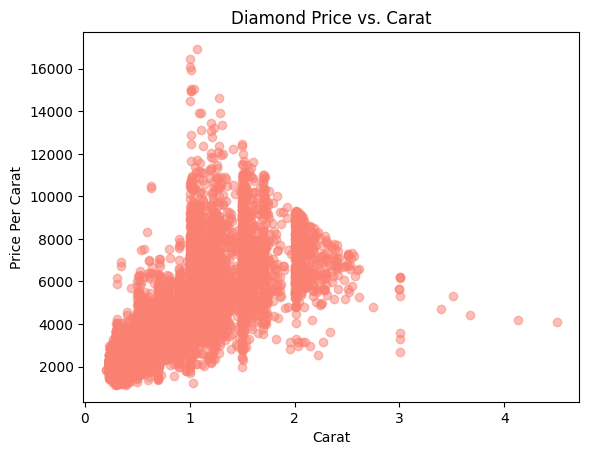

In [0]:
# Sampling diamonds_ppc DataFrame
ppc_ample_pdf = diamonds_ppc.sample(fraction=0.25, seed=1).toPandas()

# Scatter plot of price_per_carat vs. carat
plt.scatter(ppc_ample_pdf['carat'], ppc_ample_pdf['price_per_carat'], alpha=0.5, color='salmon')
plt.xlabel('Carat')
plt.ylabel('Price Per Carat')
plt.title('Diamond Price vs. Carat')
plt.show()
